# R Kernel Test in Jupyter Notebooks

Whenever I need to use [R](https://www.r-project.org/about.html), my IDE of choise is [RStudio](https://www.rstudio.com/) which is awesome! Nevertheless, in this post I explore the `R` [kernel](https://anaconda.org/chdoig/jupyter-and-conda-for-r/notebook) for [Jupyter Notebooks](http://jupyter.org/). In order to test it, I selected two simple but fun math cases.

We begin by loading the [tidyverse](https://www.tidyverse.org/).

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# This is the version I am using.
R.Version()$version.string

[1] "R version 3.5.0 (2018-04-23)"

## Fibonacci Numbers

We write a recursive function to get the [Fibonacci Numbers](https://en.wikipedia.org/wiki/Fibonacci_number). Recall that they are defined by \\(Fibonacci(1) = Fibonacci(2) = 1\\) and 

$$
Fibonacci(x) = Fibonacci(x - 1) + Fibonacci(x - 2),
$$

for \\(x > 2\\).

In [3]:
Fibonacci <- function(x) {
    
    ifelse(test = (x < 3),
           yes = 1, 
           no = (Fibonacci(x - 1) + Fibonacci(x - 2)))
}

In [4]:
# Let us compute the first 15 Fibonacci Numbers.
x <- 1:15 %>% sapply(FUN = Fibonacci)
x

[1]   1   1   2   3   5   8  13  21  34  55  89 144 233 377 610

Now we plot with the basic `R` function:

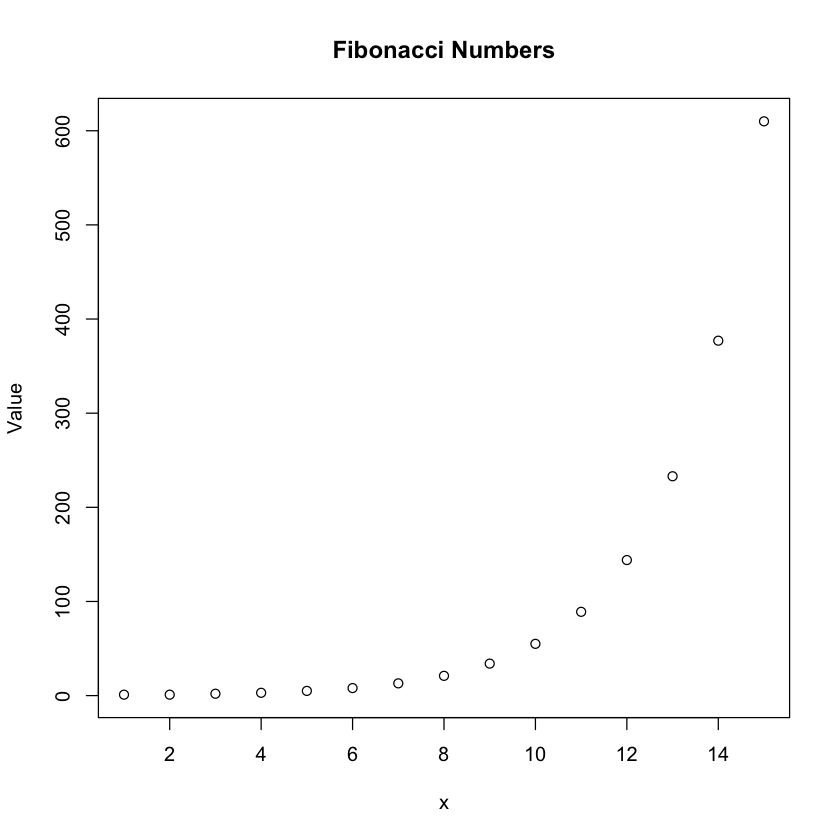

In [5]:
plot(x = x, 
     main = 'Fibonacci Numbers',
     xlab = 'x', 
     ylab = 'Value')

# \\(\pi\\) Estimation

We estimate the value of \\(\pi\\) using the relation ([Basel Problem](https://en.wikipedia.org/wiki/Basel_problem))

$$
\lim_{N\rightarrow\infty}\sum_{i=1}^N \frac{1}{n^2} = \frac{\pi^2}{6}.
$$

Let us write an estimation funtion (using the great pipe operator %>%), 

In [6]:
PiEstimateFromBaselProblem <- function(N){
    
    inverse.sq.sum <- 1:N %>% sapply(FUN = function(i) 1/(i)^2) %>% sum
                                     
    pi.estimate <- (inverse.sq.sum * 6) %>% sqrt
                                     
    return(pi.estimate)
}

We now want to plot the estimations ussing [ggplot2](https://ggplot2.tidyverse.org/).

In [7]:
# Set the estimation parameter.
N.max <- 1000

# Define a dataframe containing all the estimations.
pi.df <- data.frame(N = 1:N.max, 
                    Pi.Estimate = 1:N.max %>% sapply(FUN = PiEstimateFromBaselProblem))

pi.df %>% tail(10)

,N,Pi.Estimate
991,991,3.140629
992,992,3.140630
993,993,3.140631
994,994,3.140632
995,995,3.140633
996,996,3.140634
997,997,3.140635
998,998,3.140636
999,999,3.140637
1000,1000,3.140638


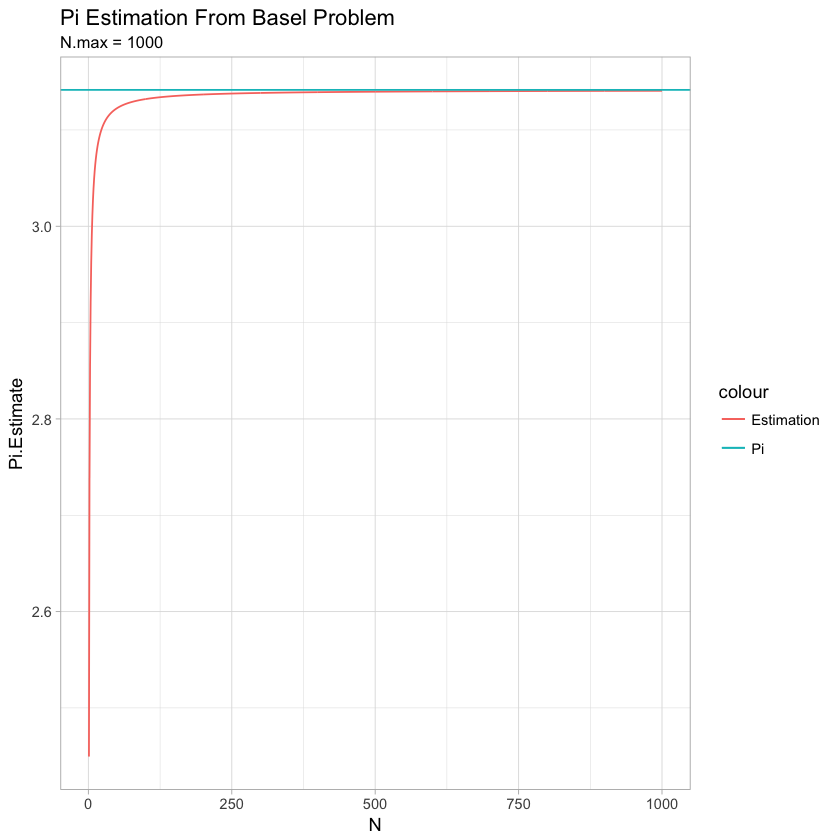

In [8]:
# Now we plot the results. 
ggplot(data = pi.df) + 

    theme_light() +

    geom_line(mapping = aes(x = N, 
                            y = Pi.Estimate, 
                            colour = 'Estimation')) +

    geom_hline(mapping = aes(yintercept = pi, 
                             color = 'Pi')) +

    ggtitle(label = 'Pi Estimation From Basel Problem', 
            subtitle = sprintf('N.max = %i', N.max))